## Exercise 1:

1. Describe in your own words the learning and classification process of decision trees.

- Choose random variable
- Choose random split,
- calculate informationgain
- compare with other random splits
- go until max. Depth is reached or the leafes are pur/not splittable

2. Which form should a decision tree have? As broad as possible, or as deep as possible? Why?

* It should rather be as broad as possible

 # Exercise 2.
 Ahospital introduces a software to support diagnosing patients. For that purpose, data on ill and
 healthy patients have been collected. Use the data to create a decision tree that predicts a patients
 health status based on their heart rate and blood pressure. Use information Gain

In [2]:
import math

Root: 8 Samples, 4 ill, 4 healthy

In [3]:
entropy_start=-( 4/8*math.log(4/8,2) + 4/8*math.log(4/8,2) )
entropy_start

1.0

Split with Heartrate: irregular: 3 ill, 0 healthy

In [10]:
entropy_heart_irr=-( 3/3*math.log(3/3,2) + 0/3*math.log(0.000000000000000001/3,2) )
entropy_heart_irr

-0.0

Regular: 1 ill, 4 health

In [11]:
entropy_heart_reg=-( 4/5*math.log(4/5,2) + 1/5*math.log(1/5,2) )
entropy_heart_reg

0.7219280948873623

weighted split: 

In [12]:
avg_heart_ent=5/8*entropy_heart_reg + 3/8*entropy_heart_irr
avg_heart_ent

0.4512050593046014

Split on bloodpressure: 6:normal(2/4) 2:abnormal(2/0)

In [14]:
entropy_bp_nor=-( 2/6*math.log(2/6,2) + 4/6*math.log(4/6,2) )
entropy_bp_nor

0.9182958340544896

In [15]:
entropy_bp_abnor=-( 2/2*math.log(2/2,2) + 0/2*math.log(0.000000001/2,2) )
entropy_bp_abnor

-0.0

In [16]:
avg_bp_ent=6/8*entropy_bp_nor + 2/8*entropy_bp_abnor
avg_bp_ent

0.6887218755408672

# Tree:
heartrate/reg/irr -> bp/nor/abnor

# Exercise 3:

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets, tree, metrics
import matplotlib.pyplot as plt
from classification_viz import plot_decisions_2d

In [20]:
# Download dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, header=None, names=["sepal_length", "sepal_width", "petal_length", "petal_width", "class"])
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [21]:
X = df.iloc[:,[2,3]]
y = df.iloc[:,4]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, shuffle=True, stratify=y, random_state=1)

Is feature scaling neccesary? 

No, because the only thing we calculate is the entropy, which is not impacted by scaling 

In [ ]:
clf = tree.DecisionTreeClassifier(criterion='gini', random_state=1)

# Train the classifier
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [28]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
print(round(metrics.accuracy_score(y_train, y_train_pred),5))
print(round(metrics.accuracy_score(y_test, y_test_pred),5))

0.98889
0.98333


In [25]:
print(clf.get_depth())
print(clf.get_n_leaves())

6
8


In [26]:
accuracies=[]
# the best test-performance without pruning was achieved with depth=13, 
#thus use range until (excluding) 14
depths=range(1,7) 
for depth in depths:
    clf = tree.DecisionTreeClassifier(criterion='gini', random_state=1, max_depth=depth)
    clf.fit(X_train, y_train)
    y_test_pred = clf.predict(X_test)
    acc=metrics.accuracy_score(y_test, y_test_pred)
    #print(k, acc)
    accuracies.append(acc)
print(f'Maximum accuracy: {np.max(accuracies)} at max-depth={np.argmax(accuracies)+1}')


Maximum accuracy: 0.9833333333333333 at max-depth=3


Text(0, 0.5, 'accuracy')

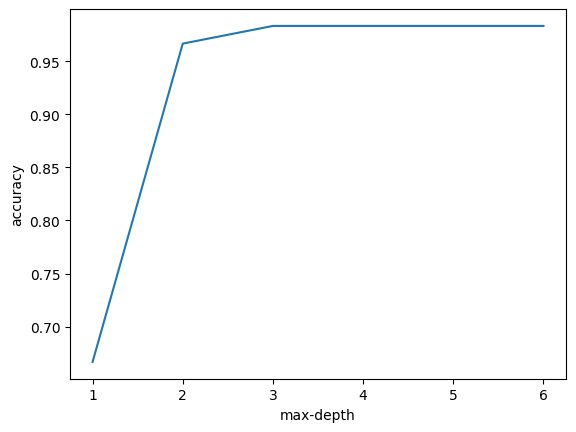

In [32]:
plt.plot(depths, accuracies)
plt.xlabel("max-depth")
plt.ylabel("accuracy")

Best depth:

In [33]:
clf = tree.DecisionTreeClassifier(criterion='gini', max_depth= 3, random_state=1)

# Train the classifier
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [39]:
y  = y.astype('category').cat.codes

c:\Users\TimPr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

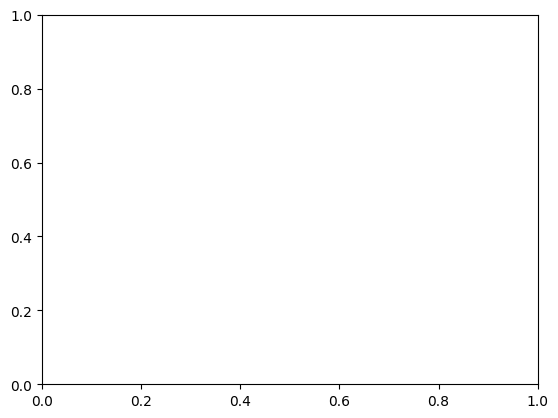

In [41]:
plot_decisions_2d(np.array(X_train),np.array(y_train),clf)